In [77]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

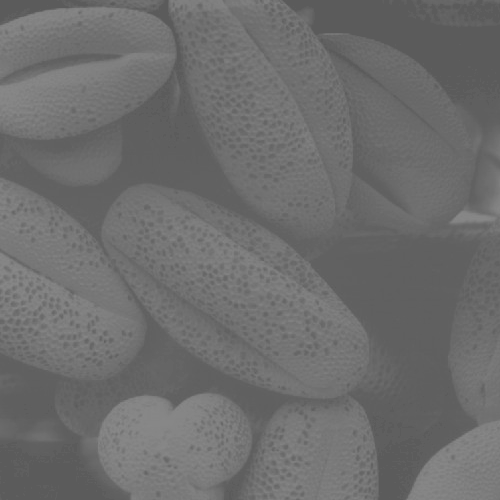

In [78]:
image=cv2.imread("input.tif")
cv2_imshow(image)

In [79]:
image.shape

(500, 500, 3)

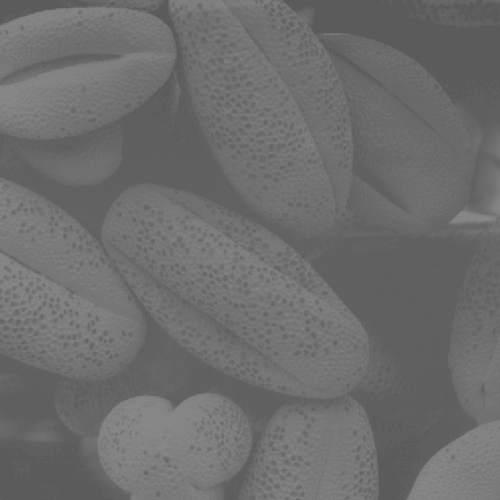

In [80]:
grayscale=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

In [81]:
grayscale.shape

(500, 500)

In [70]:
m=grayscale.shape[0]
n=grayscale.shape[1]
pdf=[0]*256
for i in range(m):
  for j in range(n):
    pdf[grayscale[i,j]]+=1

pdf[101]

5523

In [82]:
cdf = [0]*256
cdf[0] = pdf[0]
for i in range(1,256):
  cdf[i] = cdf[i-1] + pdf[i]

# cdf

In [83]:
t=[0]*256
px=500*500
for i in range(256):
  t[i]=cdf[i]/px

# t

In [84]:
for i in range(256):
  t[i]=round(255 * t[i])

# t

In [85]:
new_image = []

for row in range(0, grayscale.shape[0]):
  trow = []
  for col in range(0, grayscale.shape[1]):
    trow.append(t[grayscale[row][col]])
  new_image.append(trow)

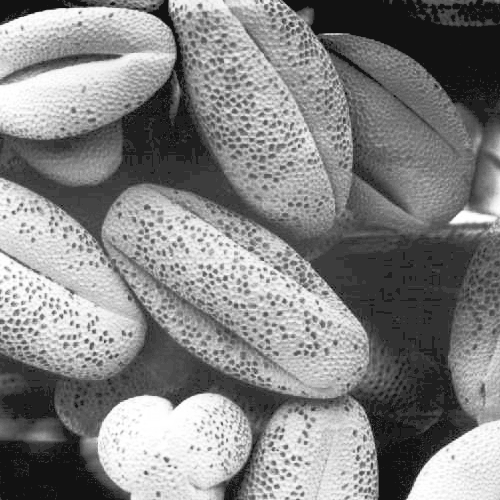

array([[ 91,  91,  91, ..., 107, 107, 105],
       [ 91,  91,  91, ..., 106, 106, 104],
       [ 91,  91,  91, ..., 103, 103, 101],
       ...,
       [ 96,  91,  91, ..., 122, 121, 121],
       [ 97,  94,  91, ..., 121, 120, 119],
       [ 98,  96,  91, ..., 120, 120, 117]], dtype=uint8)
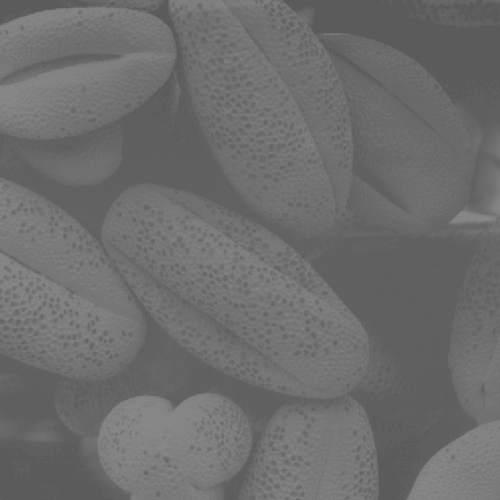

In [86]:
RI = np.array(new_image, dtype=np.uint8)

cv2_imshow(RI)
grayscale

In [44]:
  new_image

[[25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  27520000,
  28928000,
  25600000,
  25600000,
  26880000,
  27520000,
  28928000,
  28928000,
  26880000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  25600000,
  26112000,
  27520000,
  27520000,
  27520000,
  27520000,
  29696000,
  35200000,
  37

In [49]:
cv2_imshow(new_image)

AttributeError: 'list' object has no attribute 'clip'

In [51]:
new_image = np.zeros_like(grayscale) # Initialize new_image with the same shape and type as grayscale

for row in range(grayscale.shape[0]):
  for col in range(grayscale.shape[1]):
    # Apply the histogram equalization formula, scaling by 255
    new_image[row, col] = round(255 * cdf[grayscale[row, col]] / (m * n)) # Scale by total number of pixels